In [2]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipython-input-6-3508598247.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download("AAPL",start="2024-01-01",end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


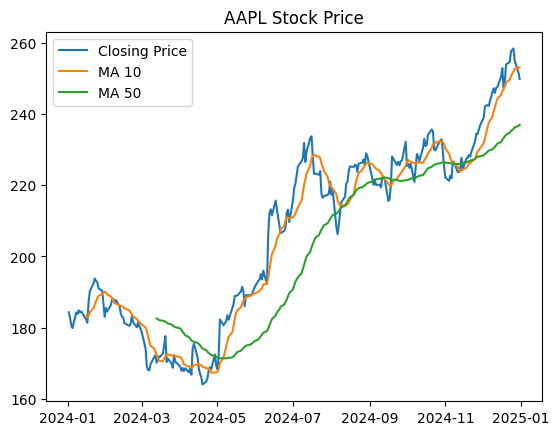

In [6]:
df=yf.download("AAPL",start="2024-01-01",end="2025-01-01")
df["MA10"]=df["Close"].rolling(10).mean()
df["MA50"]=df["Close"].rolling(50).mean()
plt.plot(df["Close"],label="Closing Price")
plt.plot(df["MA10"],label="MA 10")
plt.plot(df["MA50"],label="MA 50")
plt.legend()
plt.title("AAPL Stock Price")
plt.show()

Portfolio value at the end of the year will be $12581.25
Annual Sharpe Ratio: 1.47
Annual Returns: 25.81%


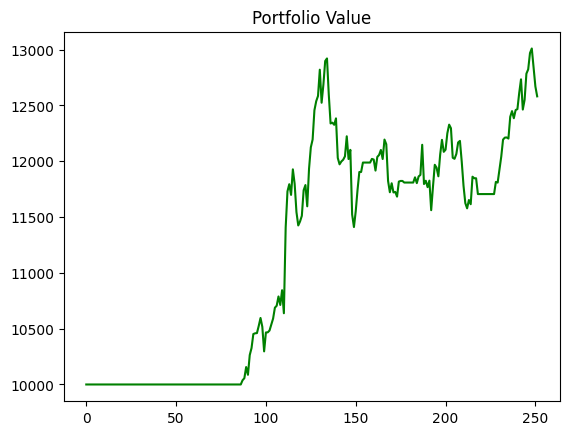

In [15]:
funds=10000
shares=0
pf_value=[]
bought=False
val=0
position=[]
for i in range(len(df)):
    buy_price=df[("Close","AAPL")].iloc[i]
    if i <50:
        pf_value.append(funds)
        position.append("skip")
        continue
    #buy condition
    elif df["MA10"].iloc[i] > df["MA50"].iloc[i] and not bought:
        shares=funds//buy_price
        funds=funds-shares*buy_price
        val=funds + buy_price*shares
        pf_value.append(val)
        position.append("bought")
        bought=True

    #sell condition
    elif df["MA10"].iloc[i] < df["MA50"].iloc[i] and bought:
        funds+=shares*buy_price
        val=funds + buy_price*shares
        pf_value.append(val)
        position.append("sold")
        shares=0
        bought=False

    #holding
    else:
        val=funds + buy_price*shares
        position.append("holding")
        pf_value.append(val)

for i in range (len(pf_value)):
    if pf_value[i]>20000:
        pf_value[i]=pf_value[i-1]
pf_value=np.array(pf_value)
daily_returns=np.diff(pf_value)/pf_value[:-1]
avg_daily_return=np.mean(daily_returns)
volatility=np.std(daily_returns)
sharpe_ratio=avg_daily_return/volatility #gives daily sharpe ratio
sharpe_ratio=sharpe_ratio*np.sqrt(252) #gives annual sharperatio

print(f"Portfolio value at the end of the year will be ${pf_value[-1]:.2f}")
print(f"Annual Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Annual Returns: {((pf_value[-1]-10000)/100):.2f}%")
plt.title("Portfolio Value")
plt.plot(np.array(pf_value),color="green")